# 스타벅스 vs 이디야 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
# 한글을 표시하기 위해 폰트를 지정합니다. 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')


In [2]:
import matplotlib.pyplot as plt
plt.rc("axes",unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
df1 = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv')

In [5]:
df1.shape

(316078, 39)

In [6]:
df1.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
1,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
2,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387
3,17174062,호구의주방,NaN,D,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,...,1156012800101600002019768,약산상가아파트,서울특별시 영등포구 선유로 269,150867,7206.0,NaN,NaN,NaN,126.897892,37.536700
4,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316078 entries, 0 to 316077
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     316078 non-null  int64  
 1   상호명        316077 non-null  object 
 2   지점명        54615 non-null   object 
 3   상권업종대분류코드  316078 non-null  object 
 4   상권업종대분류명   316078 non-null  object 
 5   상권업종중분류코드  316078 non-null  object 
 6   상권업종중분류명   316078 non-null  object 
 7   상권업종소분류코드  316078 non-null  object 
 8   상권업종소분류명   316078 non-null  object 
 9   표준산업분류코드   286026 non-null  object 
 10  표준산업분류명    286026 non-null  object 
 11  시도코드       316078 non-null  int64  
 12  시도명        316078 non-null  object 
 13  시군구코드      316078 non-null  int64  
 14  시군구명       316078 non-null  object 
 15  행정동코드      316078 non-null  int64  
 16  행정동명       315898 non-null  object 
 17  법정동코드      316078 non-null  int64  
 18  법정동명       316078 non-null  object 
 19  지번코드       316078 non-n

# EDA 

## 결측치 보기

<AxesSubplot:>

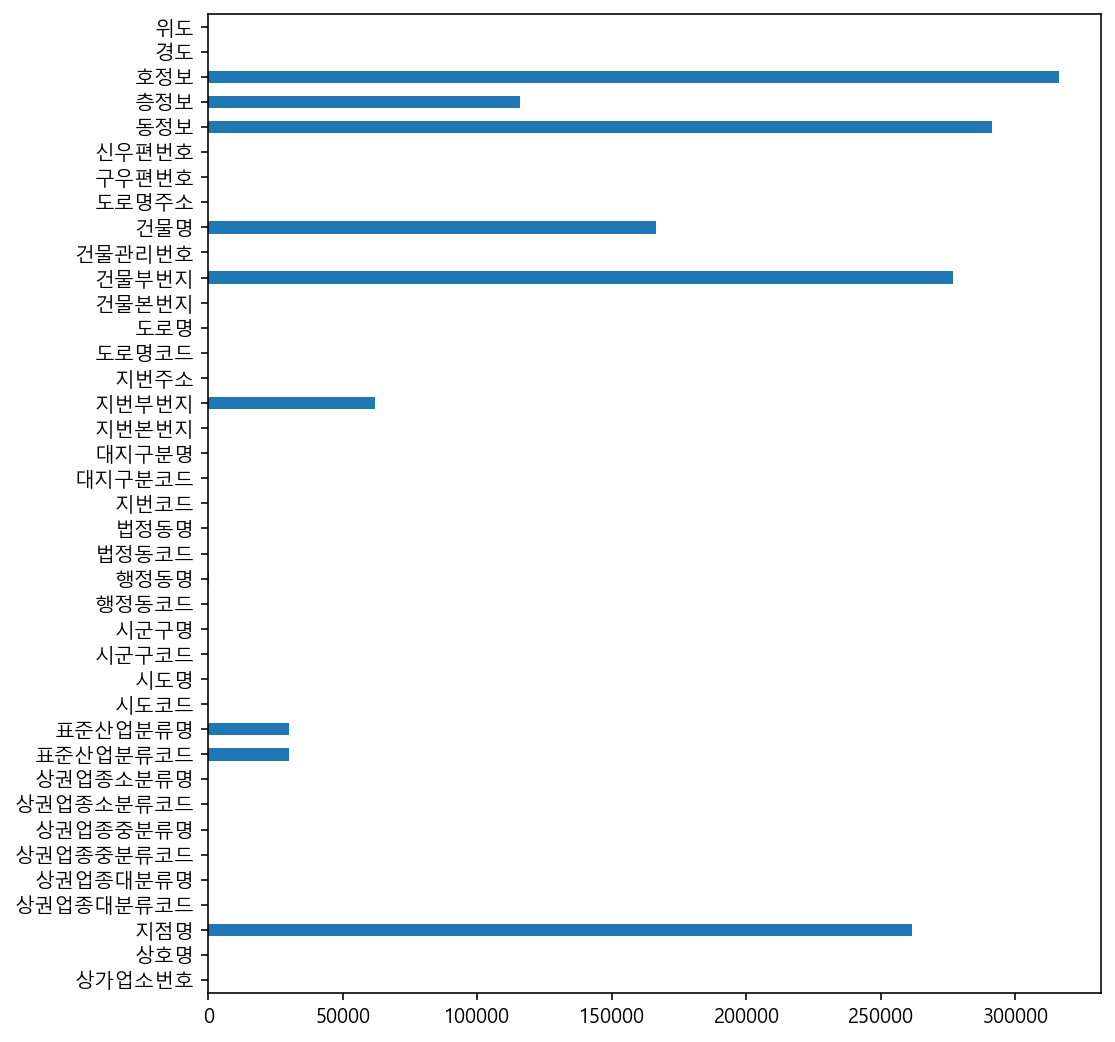

In [8]:
df1.isnull().sum().plot.barh(figsize=(8,9))

## 사용하지 않는 칼럼 제거하기 

In [9]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df1[columns].copy()
df.shape

(316078, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316078 entries, 0 to 316077
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       316077 non-null  object 
 1   상권업종대분류명  316078 non-null  object 
 2   상권업종중분류명  316078 non-null  object 
 3   상권업종소분류명  316078 non-null  object 
 4   시도명       316078 non-null  object 
 5   시군구명      316078 non-null  object 
 6   행정동명      315898 non-null  object 
 7   법정동명      316078 non-null  object 
 8   도로명주소     316078 non-null  object 
 9   경도        316078 non-null  float64
 10  위도        316078 non-null  float64
dtypes: float64(2), object(9)
memory usage: 26.5+ MB


## 일부 텍스트가 들어가는 데이터만 가져오기
 + 상호명에서 브랜드 명을 추출한다.
 + 대소문자가 섞여 있을 수 있기 때문에 대소문자를 변환해 준다
 + 오타를 방지하기 위해 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA이다.

In [11]:
df['상호명_소문자']=df['상호명'].str.lower()

In [12]:
df.loc[df["상호명_소문자"].str.contains("이디야|이디아|ediya",na=False),'상호명_소문자']

1272           이디야커피
1411           이디야커피
2433      이디야커피양재at점
2690           이디아커피
2785           이디야커피
             ...    
308958         이디야커피
310131         이디야커피
310422         이디야커피
311852         이디야커피
314146         이디야커피
Name: 상호명_소문자, Length: 474, dtype: object

In [26]:
df.loc[df["상호명_소문자"].str.contains("스타벅스|starbucks",na=False),'상호명_소문자']

1738             스타벅스
2766      스타벅스남부터미널2점
3785             스타벅스
3933             스타벅스
3995      스타벅스미아사거리역점
             ...     
313415           스타벅스
313555       스타벅스삼성교점
313843        스타벅스목동점
315403           스타벅스
315451     스타벅스조선호텔후문
Name: 상호명_소문자, Length: 491, dtype: object

In [27]:
df_cafe = df[df['상호명_소문자'].str.contains("스타벅스|starbucks|이디야|이디아|ediya|메가커피|mega",na=False)].copy()
df_cafe.shape

(1050, 12)

In [28]:
df_cafe['상호명_소문자'].unique()

array(['이디야커피', '스타벅스', '이디야커피양재at점', '이디아커피', '스타벅스남부터미널2점',
       '스타벅스미아사거리역점', '스타벅스중랑구청점', '스타벅스연신내역', '스타벅스구로디지털로점', '메가커피미아',
       '스타벅스구로에이스트윈타워1점', '스타벅스종로관수점', '스타벅스논현힐탑', '이디야서대문점2호',
       '스타벅스을지로입구', '스타벅스교대역점', '메가커피', '이디야커피은행나무사거리점', '이디야ibk고객센터',
       '스타벅스고대프라자점', '스타벅스황학캐슬점', '스타벅스소공로북창점', '스타벅스신세계본점',
       '스타벅스서울대입구역점', '스타벅스신림점', '이디아이박정어학원', '스타벅스강남삼성타운점', '스타벅스광화문점',
       '스타벅스구산역점', '스타벅스숭실대점', '스타벅스신촌점', '스타벅스여의도점', '이디야커피수유역점',
       '이디야커피돈암아리랑점', '스타벅스역삼역점', '스타벅스삼청동점', '스타벅스상암dmc센트럴몰점',
       '스타벅스신사가로수점', '이디아', '스타벅스홍대삼거리점', '스타벅스광장점', '스타벅스홍대갤러리점',
       '스타벅스경복궁역', '스타벅스합정메세나몰점', '스타벅스신촌명물거리점', '스타벅스대치점', '스타벅스광운대점',
       '이디야커피우장산동점', '이디야커피세광교회점', '이디아커피선릉아이빌점', '스타벅스올림픽공원남문점',
       '스타벅스코엑스사거리점', '이디야커피동소문동점', '스타벅스신압구정점', '스타벅스명동중앙로', '스타벅스외대점',
       '스타벅스가락시장역점', '이디야커피김안과점', '스타벅스명동역점', 'ediyacoffee', '스타벅스광화문역점',
       '스타벅스연세백양로점', '이디야커피을지로역점', '아이디아컨설턴트', '스타벅스w-mall점',
       '스타벅스월드컵경기장점', '스타벅스서초파라곤점', '스타벅스종로평창', '이디야

In [29]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명'] = "스타벅스"
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명'] = "이디야"

In [30]:
df_cafe[["상호명","브랜드명"]]

,상호명,브랜드명
1272,이디야커피,이디야
1411,이디야커피,이디야
1738,스타벅스,스타벅스
2433,이디야커피양재AT점,이디야
2690,이디아커피,이디야
...,...,...
313555,스타벅스삼성교점,스타벅스
313843,스타벅스목동점,스타벅스
314146,이디야커피,이디야
315403,스타벅스,스타벅스


# 시각화

## 스타벅스와 이디어의 서울시 분포

<AxesSubplot:>

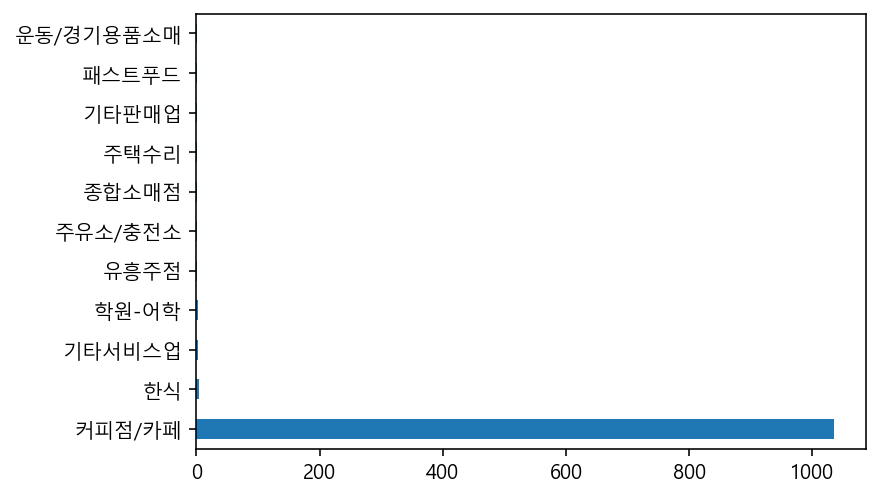

In [31]:
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [32]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"]=="커피점/카페"].copy()
df_cafe.shape

(1035, 13)

In [33]:
df_cafe["브랜드명"].value_counts()

이디야     546
스타벅스    489
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

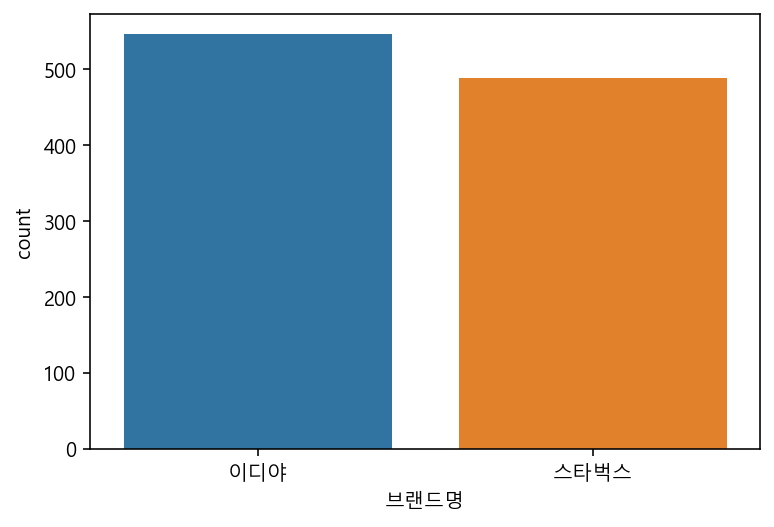

In [34]:
sns.countplot(data=df_cafe,x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

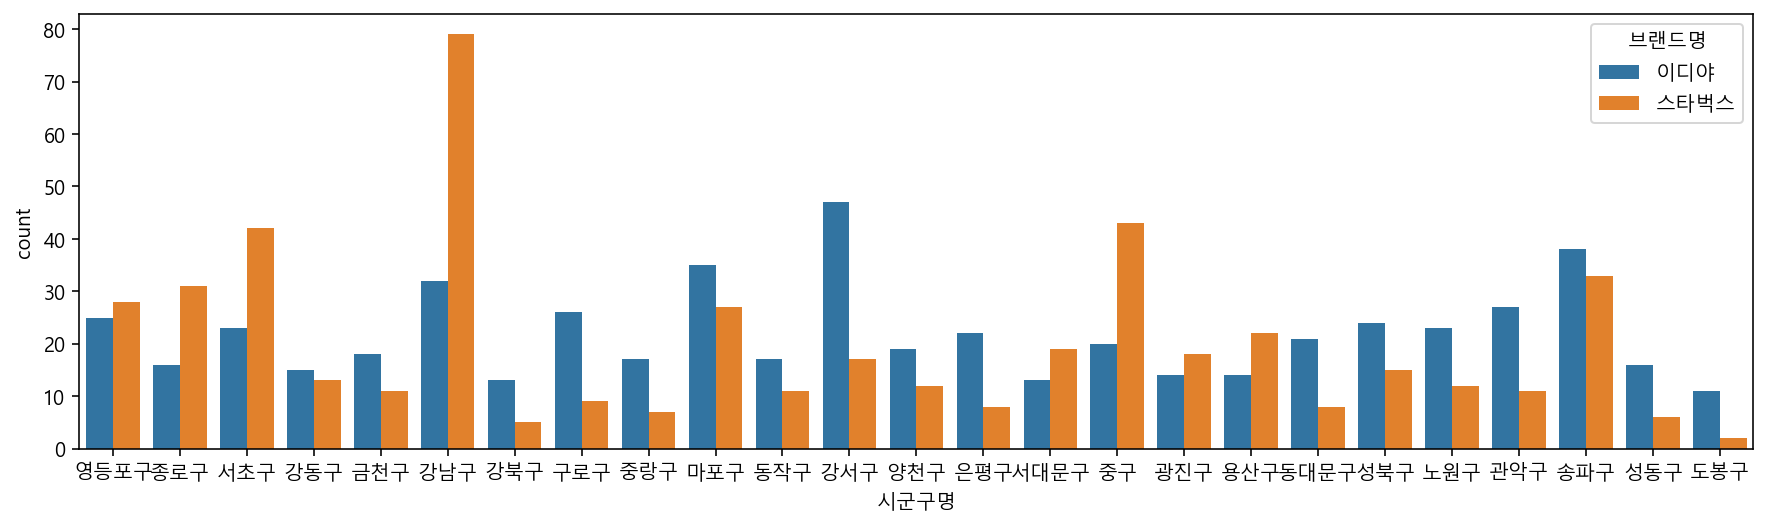

In [35]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x="시군구명",hue="브랜드명")

서울 수도권에는 스타벅스가 많고 외곽지대일 수록 이디아가 많이 입점해 있다.

<AxesSubplot:xlabel='경도', ylabel='위도'>

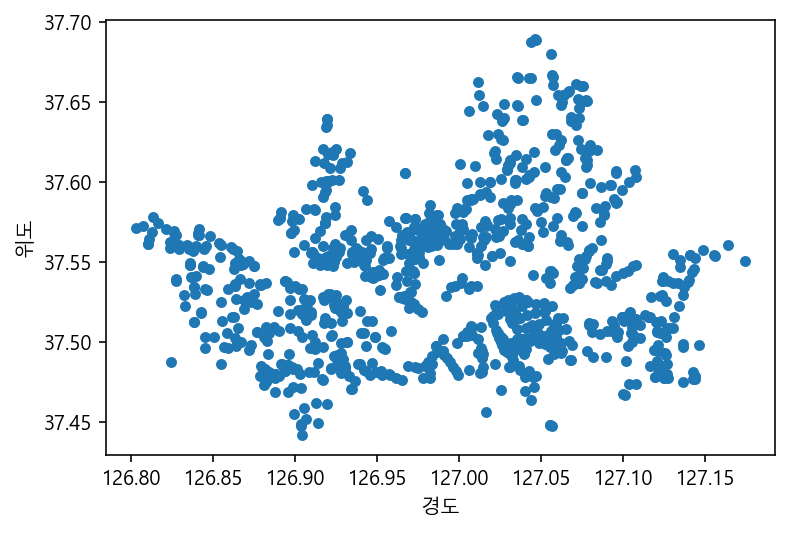

In [36]:
df_cafe[["위도","경도"]].plot.scatter(x="경도",y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

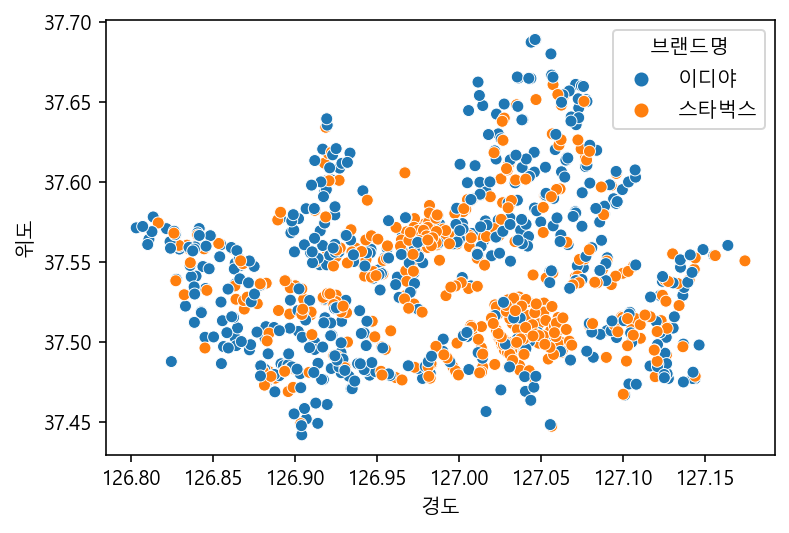

In [37]:
sns.scatterplot(data=df_cafe,x="경도",y="위도",hue="브랜드명")

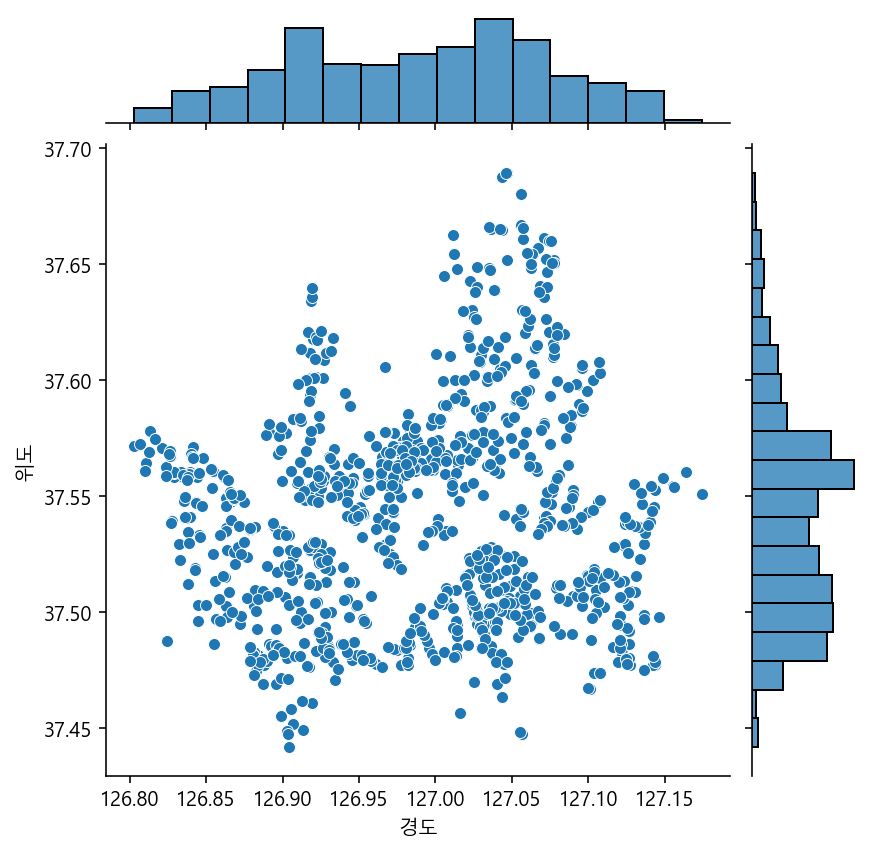

In [38]:
sns.jointplot(data=df_cafe,x="경도",y="위도")

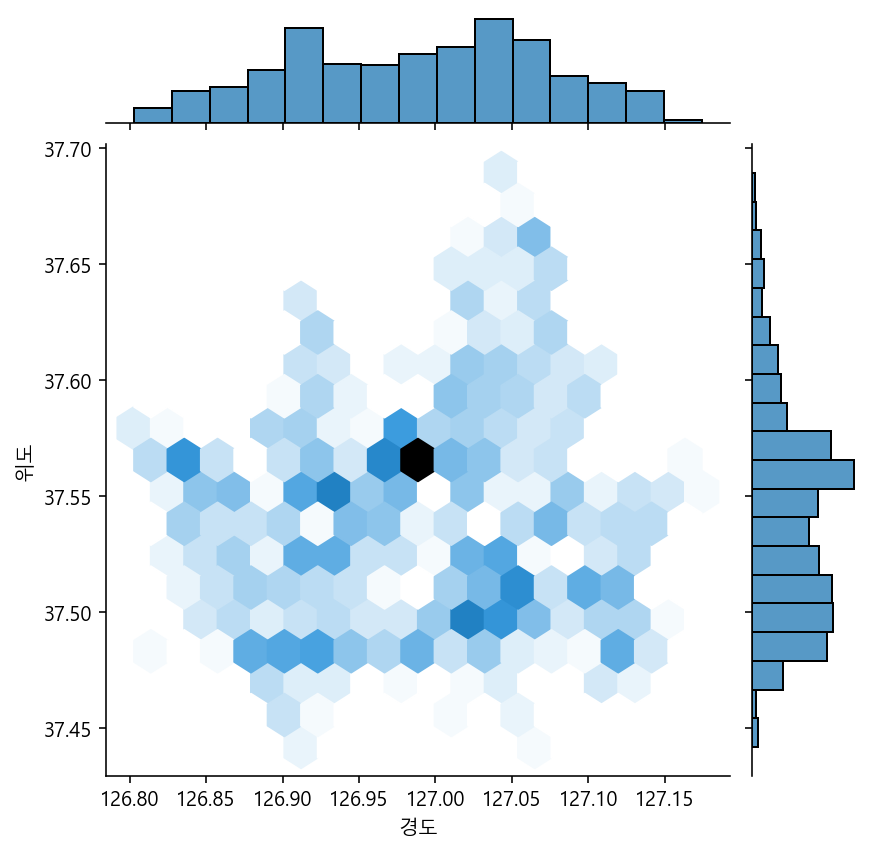

In [39]:
sns.jointplot(data=df_cafe,x="경도",y="위도",kind="hex")
plt.show()

## 구별 브랜드 점포수 비교

In [40]:
df_cafe_vs =df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
df_cafe_vs=df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,79
1,강남구,이디야,32
2,강동구,스타벅스,13
3,강동구,이디야,15
4,강북구,스타벅스,5


In [41]:
df_cafe_vs.columns = ['구','브랜드명','매장수']

In [42]:
pivot= pd.pivot_table(index=["시군구명","브랜드명"],data=df_cafe,values="상호명",aggfunc="count")

In [43]:
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,79
이디야,32


## 막대그래프로 시각화 하기

<AxesSubplot:xlabel='구', ylabel='매장수'>

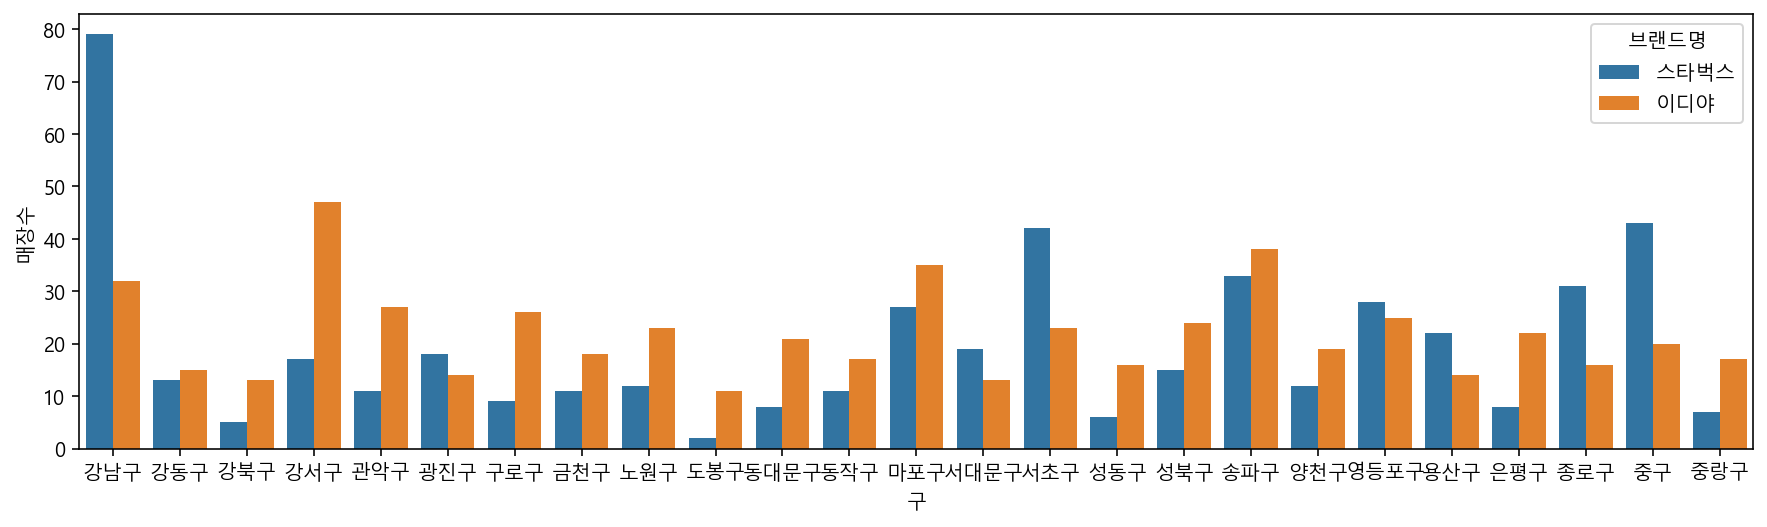

In [44]:
plt.figure(figsize=(15,4))
sns.barplot(data= df_cafe_vs,x='구',y='매장수',hue="브랜드명")

<AxesSubplot:xlabel='시군구명'>

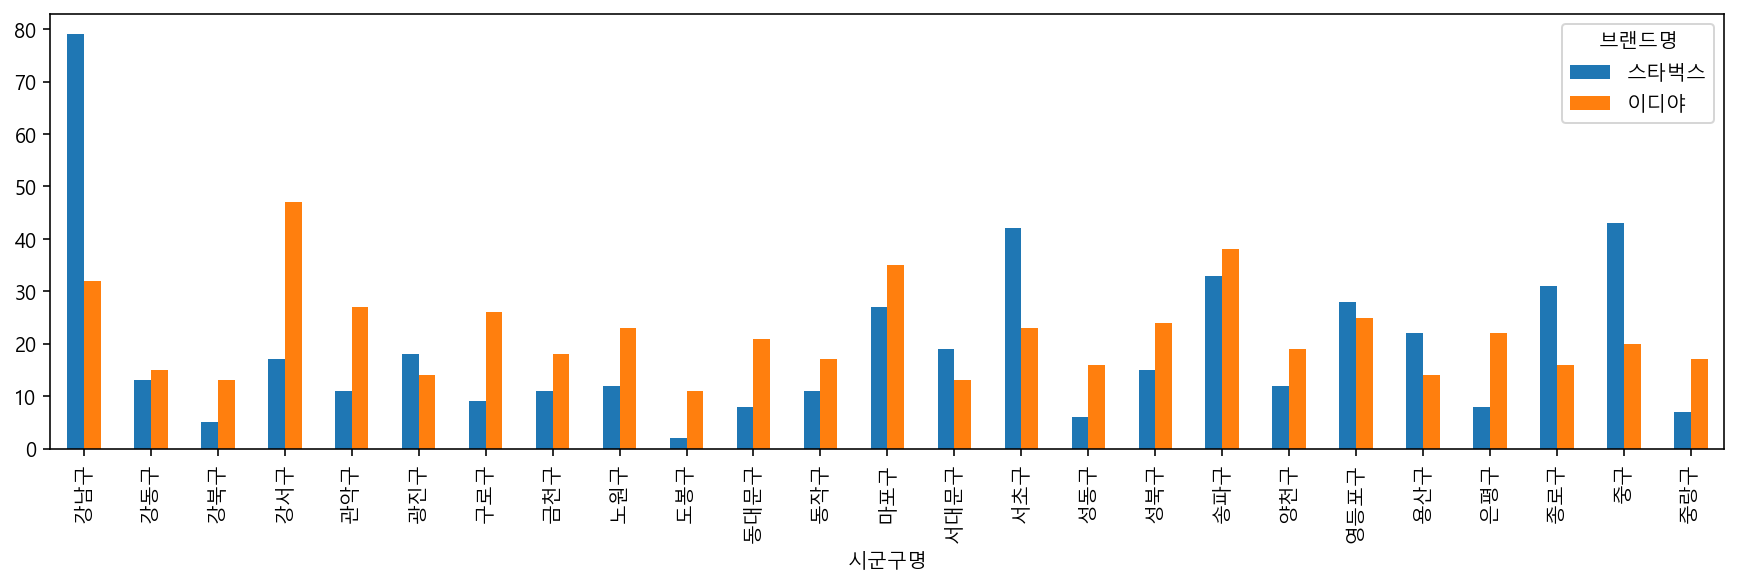

In [45]:
group = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
group.unstack().plot.bar(figsize=(15,4))